In [1]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from io import BytesIO

Load the image and display it

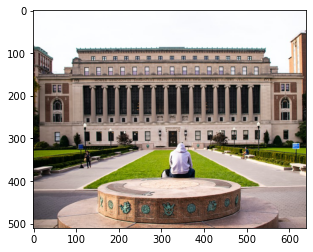

In [2]:
# image is originally from https://unsplash.com/photos/XgcdAE1Gqlg
url = 'https://www.cs.columbia.edu/~djhsu/coms4771-f20/data/chenyu-guan-XgcdAE1Gqlg-unsplash.png'
data = BytesIO(urlopen(url).read())
img = plt.imread(data)
plt.imshow(img)
plt.show()

The shape of `img` shows that it can be thought of as a stack of matrices, one per color channel (red, green, blue).

In [3]:
img.shape

(510, 640, 3)

Compute the singular values of the red color channel, and plot them on a logarithmic scale against the index.

(510, 510)
(510, 640)


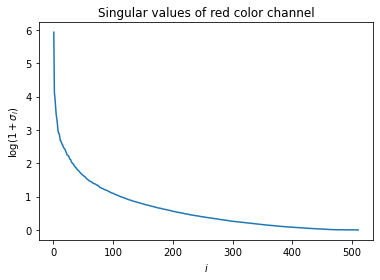

In [19]:
U,s,V = np.linalg.svd(img[:,:,0], full_matrices=False)
# print(U.shape)
# print(V.shape)
ax = plt.gca()
ax.plot(range(1,1+len(s)), np.log(1+s))
ax.set_xlabel('$i$')
ax.set_ylabel('$\log(1+\sigma_i)$')
ax.set_title('Singular values of red color channel')
plt.show()

In [41]:
print(np.matmul(np.matmul(U, np.diag(s)), V))

[[0.9843138  0.9843134  0.98431355 ... 0.97647095 0.97647053 0.9764704 ]
 [0.98431396 0.98431367 0.98431385 ... 0.9764706  0.9764709  0.97647065]
 [0.98431396 0.9843134  0.98431355 ... 0.97647077 0.97647053 0.9764704 ]
 ...
 [0.501961   0.50980383 0.52156895 ... 0.662745   0.65490204 0.64705884]
 [0.5372552  0.5411766  0.5411767  ... 0.6666667  0.6549019  0.647059  ]
 [0.5725492  0.58039194 0.5843139  ... 0.6627451  0.6470592  0.6431377 ]]


Implement a function that takes as input an image and returns a "compressed" image in which each color channel is represented by a rank $k$ matrix (where $k$ is specified by the user). Choose the rank $k$ matrix that is closest to the original matrix in Frobenius norm.

In [63]:
def compressed_image(k, img):
    """Compute the best rank k approximation of each channel of a given image

    @param k: the rank of the approximation
    @param img: a (M, N, 3) numpy ndarray 
    @return new_img: the approximate image as a (M, N, 3) numpy ndarray
    """

    new_img = np.empty(img.shape)
    # IMPLEMENT ME
    U_r,s_r,V_r = np.linalg.svd(img[:,:,0], full_matrices=False)
    s_r_mat = np.diag(s_r[:k])
    U_r = U_r[:, 0:k]
    V_r = V_r[0:k, :]
    
    
    U_g,s_g,V_g = np.linalg.svd(img[:,:,1], full_matrices=False)
    s_g_mat = np.diag(s_g[:k])
    U_g = U_g[:, 0:k]
    V_g = V_g[0:k, :]
    
    U_b,s_b,V_b = np.linalg.svd(img[:,:,2], full_matrices=False)
    s_b_mat = np.diag(s_b[:k])
    U_b = U_b[:, 0:k]
    V_b = V_b[0:k, :]
    
    new_img[:, :, 0] = np.matmul(np.matmul(U_r, s_r_mat), V_r)
    new_img[:, :, 1] = np.matmul(np.matmul(U_g, s_g_mat), V_g)
    new_img[:, :, 2] = np.matmul(np.matmul(U_b, s_b_mat), V_b)
    return new_img

Display the compressed versions of the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


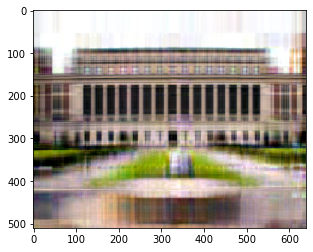

In [64]:
plt.imshow(compressed_image(8, img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


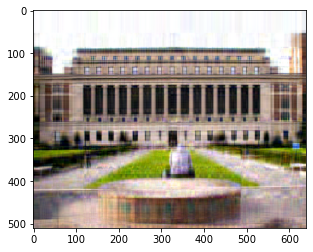

In [65]:
plt.imshow(compressed_image(16, img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


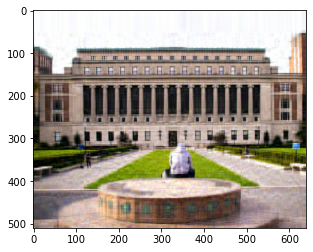

In [66]:
plt.imshow(compressed_image(32, img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


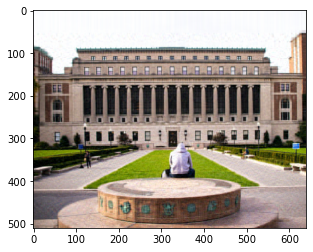

In [67]:
plt.imshow(compressed_image(64, img))